In [1]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
### 1...covidnig.csv from NCDC Website
### 2...(a) Global Daily Confirmed Cases from John Hopkins Repository
###   ...(b) Global Daily Recovered Cases from John Hopkins Repository
###   ...(c) Global Daily Death Cases from John Hopkins Repository
### 3...External Data from Ustacky Github Repository such as:
###   ...(a) covid_external.csv
###   ...(b) Budget data.csv
###   ...(c) RealGDP.csv   

# Reading The Data

In [3]:
data = pd.read_csv('covidnig.csv')

In [4]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [5]:
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [6]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [7]:
covid_external = pd.read_csv('https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covid_external.csv')

In [8]:
BG = pd.read_csv('https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/Budget%20data.csv')

In [9]:
RG = pd.read_csv('https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/RealGDP.csv')

# Viewing The Data

In [10]:
data = pd.read_csv('covidnig.csv')

In [11]:
data.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [12]:
data.shape

(37, 5)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [14]:
# The dataset 37 rows and 5 columns. 4 of the 5 columns are object datatypes and only 1 is an integer
# The information in the dataset also shows that there are no missing values. And the memory usage is 1.6KB.

In [15]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [16]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [17]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [18]:
# The Daily Global Confirmed Cases Dataset shows 289 rows and 1147 columns. Memory usage is 2.5MB

In [19]:
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [20]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.4+ MB


In [22]:
# The Daily Global Recovered Cases Dataset shows 274 rows and 1147 columns. Memory usage is 2.4MB

In [23]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [24]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [25]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [26]:
# The Daily Global Death Cases Dataset shows 289 rows and 1147 columns. Memory usage is 2.5MB

In [27]:
covid_external = pd.read_csv('https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covid_external.csv')

In [28]:
covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [29]:
covid_external.shape

(37, 12)

In [30]:
covid_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [31]:
# The information in this dataset shows that there are 37 rows and 12 columns. 
# There are no missing values. And the memory usage is 3.6KG.

In [32]:
BG = pd.read_csv('https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/Budget%20data.csv')

In [33]:
BG.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [34]:
BG.shape

(37, 3)

In [35]:
BG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [36]:
# The information in this dataset shows that there are 37 rows and 3 columns. 
# There are no missing values. And the memory usage is 1016.0 bytes.

In [37]:
RG = pd.read_csv('https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/RealGDP.csv')

In [38]:
RG

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [39]:
RG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [40]:
# There are 7 rows and 5 columns. No missing values. And the memory usage is 408.0 bytes

# Data Cleaning and Preparation

In [41]:
data.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [42]:
data.duplicated().any()

False

In [43]:
column_names = ['states', 'Lab Confirmed', 'On Admission', 'No. Discharged', 'No. of Deaths']

In [44]:
data.columns = column_names

In [45]:
data['Lab Confirmed'] = data['Lab Confirmed'].str.replace(',','').astype(int)
data['On Admission'] = data['On Admission'].str.replace(',','').astype(int)
data['No. Discharged'] = data['No. Discharged'].str.replace(',','').astype(int)

In [46]:
data.head()

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [47]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [48]:
confirmed['Country/Region'] == 'Nigeria'

0      False
1      False
2      False
3      False
4      False
       ...  
284    False
285    False
286    False
287    False
288    False
Name: Country/Region, Length: 289, dtype: bool

In [49]:
dfc = confirmed[confirmed['Country/Region'] == 'Nigeria']

In [50]:
dfc

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598


In [51]:
confirmed.iloc[206]

Province/State        NaN
Country/Region    Nigeria
Lat                 9.082
Long               8.6753
1/22/20                 0
                   ...   
3/5/23             266598
3/6/23             266598
3/7/23             266598
3/8/23             266598
3/9/23             266598
Name: 206, Length: 1147, dtype: object

In [52]:
dfconfirmed = confirmed.iloc[206].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 0).reset_index()

In [53]:
dfconfirmed.columns = ['Date', 'Cases']

In [54]:
import datetime as dt

In [55]:
dfconfirmed['Date'] = pd.to_datetime(dfconfirmed['Date'])

In [56]:
dfconfirmed

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,266598
1139,2023-03-06,266598
1140,2023-03-07,266598
1141,2023-03-08,266598


In [57]:
dfconfirmed.duplicated().any()

False

In [58]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
recovered['Country/Region'] == 'Nigeria'

0      False
1      False
2      False
3      False
4      False
       ...  
269    False
270    False
271    False
272    False
273    False
Name: Country/Region, Length: 274, dtype: bool

In [60]:
dfr = recovered[recovered['Country/Region'] == 'Nigeria']

In [61]:
dfr

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
191,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
recovered.iloc[191]

Province/State        NaN
Country/Region    Nigeria
Lat                 9.082
Long               8.6753
1/22/20                 0
                   ...   
3/5/23                  0
3/6/23                  0
3/7/23                  0
3/8/23                  0
3/9/23                  0
Name: 191, Length: 1147, dtype: object

In [63]:
dfrecovered = recovered.iloc[191].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 0).reset_index()

In [64]:
dfrecovered.columns = ['Date', 'Cases']

In [65]:
import datetime as dt

In [66]:
dfrecovered['Date'] = pd.to_datetime(dfrecovered['Date'])

In [67]:
dfrecovered

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,0
1139,2023-03-06,0
1140,2023-03-07,0
1141,2023-03-08,0


In [68]:
dfrecovered.duplicated().any()

False

In [69]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [70]:
deaths['Country/Region'] == 'Nigeria'

0      False
1      False
2      False
3      False
4      False
       ...  
284    False
285    False
286    False
287    False
288    False
Name: Country/Region, Length: 289, dtype: bool

In [71]:
dfd = deaths[deaths['Country/Region'] == 'Nigeria']

In [72]:
deaths.iloc[206]

Province/State        NaN
Country/Region    Nigeria
Lat                 9.082
Long               8.6753
1/22/20                 0
                   ...   
3/5/23               3155
3/6/23               3155
3/7/23               3155
3/8/23               3155
3/9/23               3155
Name: 206, Length: 1147, dtype: object

In [73]:
dfdeaths = deaths.iloc[206].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 0).reset_index()

In [74]:
dfdeaths.columns = ['Date', 'Cases']

In [75]:
import datetime as dt

In [76]:
dfdeaths['Date'] = pd.to_datetime(dfdeaths['Date'])

In [77]:
dfdeaths

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,3155
1139,2023-03-06,3155
1140,2023-03-07,3155
1141,2023-03-08,3155


In [78]:
dfdeaths.duplicated().any()

False

# Analysis

In [79]:
data.head()

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [80]:
data.nlargest(10, 'Lab Confirmed', keep='first')

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [81]:
Top_10_States = data.nlargest(10, 'Lab Confirmed', keep='first')

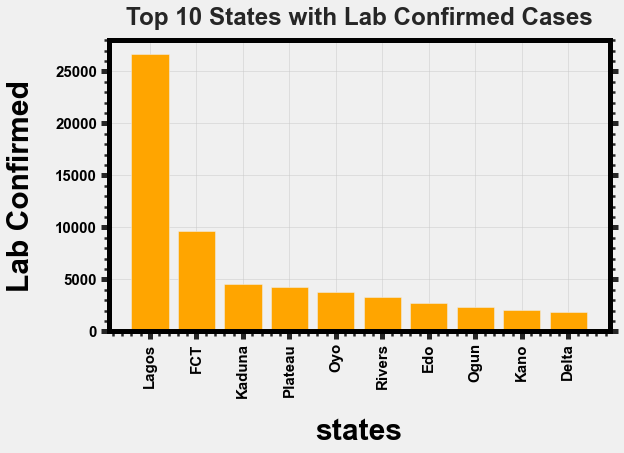

In [82]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.bar(Top_10_States['states'], Top_10_States['Lab Confirmed'], color = 'orange')
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('states', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.ylabel('Lab Confirmed', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Top 10 States with Lab Confirmed Cases', fontweight = 'bold', fontsize = 'xx-large', pad = 15)
plt.savefig('Top 10 States with Lab Confirmed Cases.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [83]:
# Lagos State had the highest Laboratory Confirmed cases of covid-19

In [84]:
Top_10_nsmallest_Confirmed = data.nsmallest(10, 'Lab Confirmed', keep='first')

In [85]:
Top_10_nsmallest_Confirmed

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
36,Kogi,5,0,3,2
35,Zamfara,79,1,73,5
34,Cross River,93,1,81,11
33,Kebbi,143,5,130,8
32,Yobe,164,33,123,8
31,Taraba,203,19,177,7
30,Sokoto,228,40,171,17
29,Anambra,299,6,274,19
28,Adamawa,355,96,238,21
27,Niger,381,69,300,12


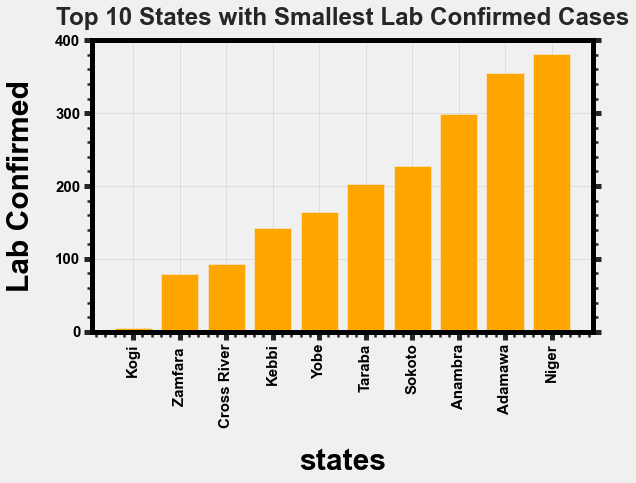

In [86]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.bar(Top_10_nsmallest_Confirmed['states'], Top_10_nsmallest_Confirmed['Lab Confirmed'], color = 'orange')
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('states', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.ylabel('Lab Confirmed', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Top 10 States with Smallest Lab Confirmed Cases', fontweight = 'bold', fontsize = 'xx-large', pad = 15)
plt.savefig('Top 10 States with Smallest Lab Confirmed Cases.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [87]:
# While Kogi State recorded lowest Laboratory confirmed cases of covid-19

In [88]:
data.nlargest(10, 'No. Discharged', keep='first')

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
3,Plateau,4262,280,3948,34
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [89]:
Top_10_States_No_of_Discharged = data.nlargest(10, 'No. Discharged', keep='first')

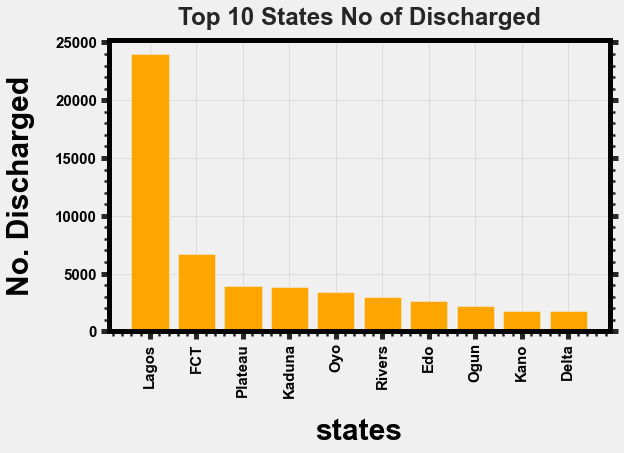

In [90]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.bar(Top_10_States_No_of_Discharged['states'], Top_10_States_No_of_Discharged['No. Discharged'], color = 'orange')
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('states', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.ylabel('No. Discharged', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Top 10 States No of Discharged', fontweight = 'bold', fontsize = 'xx-large', pad = 15)
plt.savefig('Top 10 States No of Discharged.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [91]:
# Lagos State had the highest Number of Discharged people from covid-19 Isolation Centers

In [155]:
Top_10_nsmallest_Discharged = data.nsmallest(10, 'No. Discharged', keep='first')

In [156]:
Top_10_nsmallest_Discharged

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
36,Kogi,5,0,3,2
35,Zamfara,79,1,73,5
34,Cross River,93,1,81,11
32,Yobe,164,33,123,8
33,Kebbi,143,5,130,8
30,Sokoto,228,40,171,17
31,Taraba,203,19,177,7
28,Adamawa,355,96,238,21
29,Anambra,299,6,274,19
27,Niger,381,69,300,12


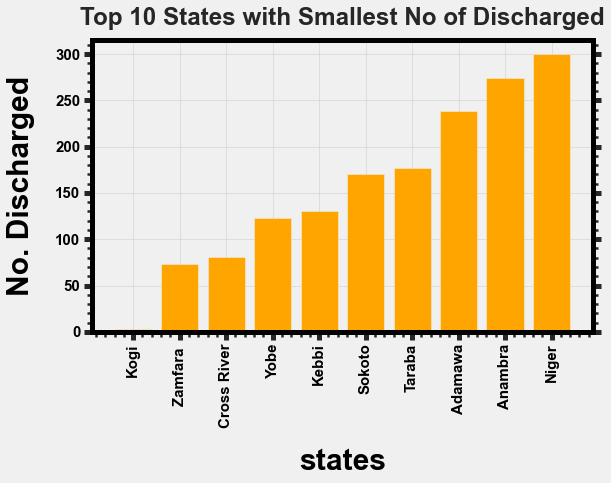

In [157]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.bar(Top_10_nsmallest_Discharged['states'], Top_10_nsmallest_Discharged['No. Discharged'], color = 'orange')
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('states', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.ylabel('No. Discharged', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Top 10 States with Smallest No of Discharged', fontweight = 'bold', fontsize = 'xx-large', pad = 15)
plt.savefig('Top 10 States with Smallest No of Discharged.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [158]:
# Kogi State had the lowest No of Discharged people from covid-19

In [159]:
data.nlargest(10, 'No. of Deaths', keep='first')

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
6,Edo,2768,52,2603,113
1,FCT,9627,2840,6694,93
5,Rivers,3279,232,2987,60
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
10,Ondo,1793,62,1690,41
19,Borno,778,37,705,36


In [160]:
Top_10_States_No_of_Deaths = data.nlargest(10, 'No. of Deaths', keep='first')

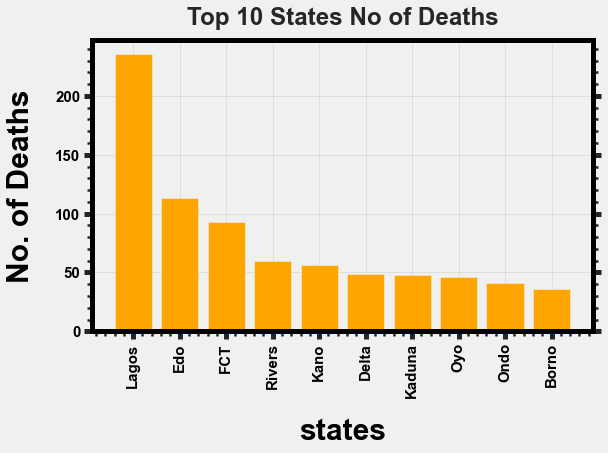

In [161]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.bar(Top_10_States_No_of_Deaths['states'], Top_10_States_No_of_Deaths['No. of Deaths'], color = 'orange')
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('states', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.ylabel('No. of Deaths', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Top 10 States No of Deaths', fontweight = 'bold', fontsize = 'xx-large', pad = 15)
plt.savefig('Top 10 States No of Deaths.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [162]:
# Lagos State recorded the highest No of Deaths of people with covid-19

In [163]:
Top_10_nsmallest_deaths = data.nsmallest(10, 'No. of Deaths', keep='first')

In [164]:
Top_10_nsmallest_deaths

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
36,Kogi,5,0,3,2
35,Zamfara,79,1,73,5
24,Ekiti,405,24,375,6
31,Taraba,203,19,177,7
32,Yobe,164,33,123,8
33,Kebbi,143,5,130,8
25,Akwa Ibom,395,44,342,9
16,Abia,980,25,945,10
22,Benue,515,44,460,11
26,Jigawa,386,57,318,11


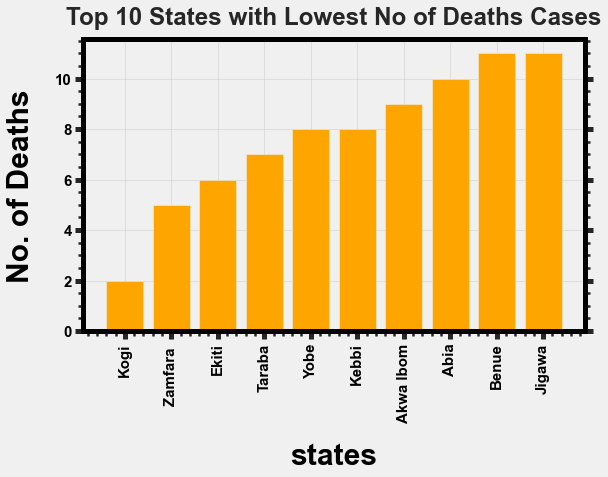

In [165]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.bar(Top_10_nsmallest_deaths['states'], Top_10_nsmallest_deaths['No. of Deaths'], color = 'orange')
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('states', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.ylabel('No. of Deaths', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Top 10 States with Lowest No of Deaths Cases', fontweight = 'bold', fontsize = 'xx-large', pad = 15)
plt.savefig('Top 10 States with Lowest No of Deaths.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [166]:
# Kogi State recorded the lowest No of Deaths of people with covid-19

In [167]:
dfconfirmed.groupby(['Date'])['Cases'].sum()

Date
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2023-03-05    266598
2023-03-06    266598
2023-03-07    266598
2023-03-08    266598
2023-03-09    266598
Name: Cases, Length: 1143, dtype: object

In [168]:
confirmed_cases = (dfconfirmed.groupby('Date').sum()).sort_values(by = 'Cases', ascending = False).head(10).reset_index()

In [169]:
confirmed_cases

,Date,Cases
0,2023-03-09,266598
1,2023-03-08,266598
2,2023-03-07,266598
3,2023-03-06,266598
4,2023-03-05,266598
5,2023-03-04,266598
6,2023-03-03,266598
7,2023-03-02,266598
8,2023-03-01,266598
9,2023-02-28,266593


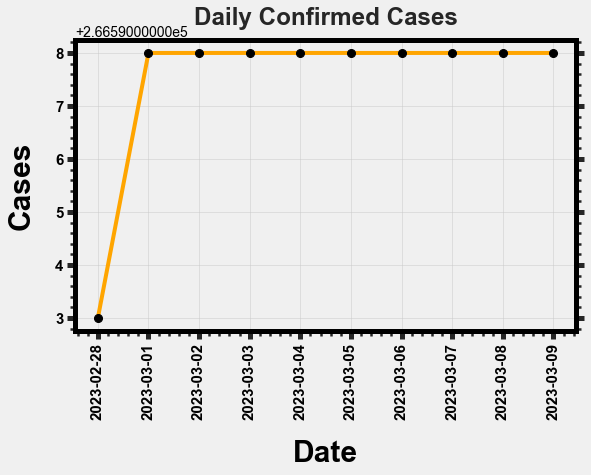

In [170]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(confirmed_cases['Date'], confirmed_cases['Cases'], color = 'orange',marker = 'o', ms = '8', mec = 'k', mfc ='k' )
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('Date', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.ylabel('Cases', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Daily Confirmed Cases', fontweight = 'bold', fontsize = 'xx-large', pad = 15)
plt.savefig('Daily Confirmed Cases.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [171]:
# The rate of daily Confirmed Cases of covid-19 was lower in February 28, 2023. And much higher in March, 2023

In [172]:
dfrecovered.groupby(['Date'])['Cases'].sum()

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
             ..
2023-03-05    0
2023-03-06    0
2023-03-07    0
2023-03-08    0
2023-03-09    0
Name: Cases, Length: 1143, dtype: object

In [173]:
recovered_cases = (dfrecovered.groupby('Date').sum()).sort_values(by = 'Cases', ascending = False).head(10).reset_index()

In [174]:
recovered_cases

,Date,Cases
0,2021-08-04,165208
1,2021-08-03,165122
2,2021-08-02,165037
3,2021-08-01,165005
4,2021-07-31,164994
5,2021-07-30,164978
6,2021-07-29,164930
7,2021-07-28,164886
8,2021-07-27,164837
9,2021-07-26,164798


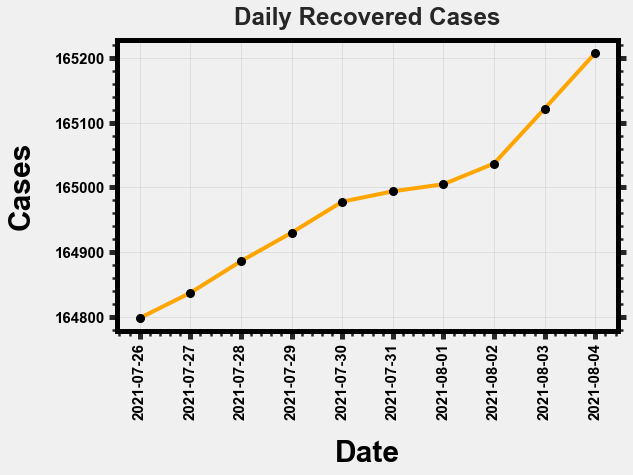

In [175]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(recovered_cases['Date'], recovered_cases['Cases'], color = 'orange',marker = 'o', ms = '8', mec = 'k', mfc ='k' )
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('Date', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.ylabel('Cases', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Daily Recovered Cases', fontweight = 'bold', fontsize = 'xx-large', pad = 15)
plt.savefig('Daily Recovered Cases.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [176]:
# The rate of daily recovered cases of covid-19 started rising from July 2021 to August 2021.

In [177]:
dfdeaths.groupby(['Date'])['Cases'].sum()

Date
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2023-03-05    3155
2023-03-06    3155
2023-03-07    3155
2023-03-08    3155
2023-03-09    3155
Name: Cases, Length: 1143, dtype: object

In [178]:
deaths_cases = (dfdeaths.groupby('Date').sum()).sort_values(by = 'Cases', ascending = False).head(10).reset_index()

In [179]:
deaths_cases

,Date,Cases
0,2023-03-09,3155
1,2022-10-27,3155
2,2022-11-16,3155
3,2022-11-15,3155
4,2022-11-14,3155
5,2022-11-13,3155
6,2022-11-12,3155
7,2022-11-11,3155
8,2022-11-10,3155
9,2022-11-09,3155


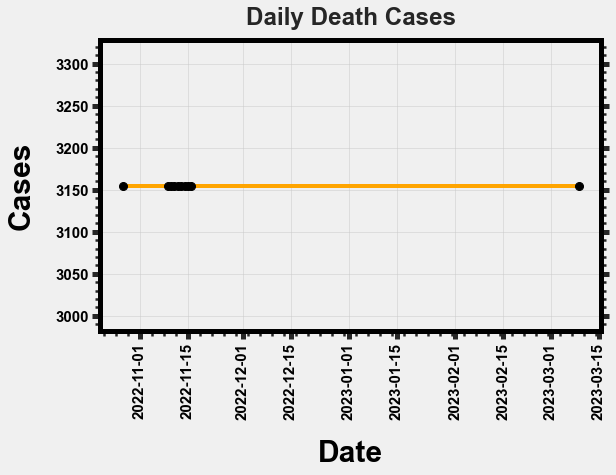

In [180]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(deaths_cases['Date'], deaths_cases['Cases'], color = 'orange',marker = 'o', ms = '8', mec = 'k', mfc ='k' )
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('Date', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.ylabel('Cases', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Daily Death Cases', fontweight = 'bold', fontsize = 'xx-large', pad = 15)
plt.savefig('Daily Death Cases.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [181]:
# The daily death cases from November 2022 to March 2023 remained unchanged. There was no increase.

In [182]:
Daily_Infection_Rate = dfconfirmed.diff()

In [183]:
Daily_Infection_Rate

,Date,Cases
0,NaT,NaN
1,1 days,0
2,1 days,0
3,1 days,0
4,1 days,0
...,...,...
1138,1 days,0
1139,1 days,0
1140,1 days,0
1141,1 days,0


In [184]:
Daily_Infection_Rate.columns = ['Days', 'Cases']

In [185]:
Daily_Infection_Rate.dropna(axis = 0)

,Days,Cases
1,1 days,0
2,1 days,0
3,1 days,0
4,1 days,0
5,1 days,0
...,...,...
1138,1 days,0
1139,1 days,0
1140,1 days,0
1141,1 days,0


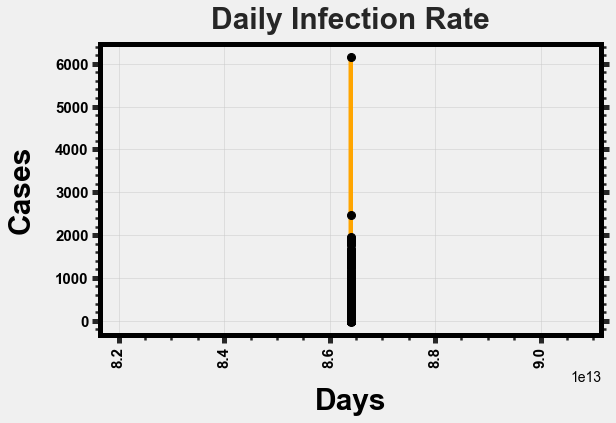

In [186]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(Daily_Infection_Rate['Days'], Daily_Infection_Rate['Cases'], color = 'orange',marker = 'o', ms = '8', mec = 'k', mfc ='k' )
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 15, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 15, bottom = True, left = True, right = True)
plt.xlabel('Days', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.ylabel('Cases', fontweight = 'bold', fontsize = 30, color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Daily Infection Rate', fontweight = 'bold', fontsize = 30, pad = 15)
plt.savefig('Daily Infection Rate.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [187]:
# The Daily Infection Rate increases within 2 days from over 2000 to over 6000.

In [188]:
Maximum_Infection_Rate = Daily_Infection_Rate.max()

In [189]:
Maximum_Infection_Rate

Days     1 days 00:00:00
Cases               6158
dtype: object

In [190]:
# The Spike in Infection Rate occured between '2023-02-28'-'2023-03-01'.That is February Ending to Early March, 2023

In [191]:
import pandas as pd

In [ ]:
external = pd.read_csv('https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covid_external.csv')

In [ ]:
external.head()

In [ ]:
pd.merge(external, data, on=['states']).head()

In [ ]:
data_ex = pd.merge(external, data, on=['states'])

In [ ]:
external_data = data_ex.nlargest(10, 'Overall CCVI Index', keep='first')

In [ ]:
external_data.head()

In [ ]:
fig = plt.figure(figsize = (8, 5))
ax1 = fig.add_subplot()
line1, = ax1.plot(external_data['states'], external_data['Overall CCVI Index'], 
color = 'green', marker = 'o', ms = '8', mec = 'k', mfc ='k')
plt.minorticks_on()
ax1.set_xlabel('states', color = 'black', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax1.set_ylabel('Overall CCVI Index', color = 'k', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax1.tick_params(direction = 'out', length=8, width=5, color = 'k', grid_alpha=0.5, 
axis = 'both', labelsize = 30, which = 'major', bottom = True)
ax1.tick_params(axis = 'x', labelcolor = 'black', labelrotation = 90)
ax1.tick_params(direction = 'out', length=5, width=2.5, color = 'k', grid_alpha=0.5, 
axis = 'both', labelsize = 30, which = 'minor', bottom = True)
ax1.tick_params(axis = 'y', labelsize = 26)

ax2 = ax1.twinx()
line2, = ax2.plot(external_data['states'], external_data['Lab Confirmed'], 
color = 'blue', marker = 'o', ms = '8', mec = 'k', mfc ='k')
ax2.set_ylabel('Lab Confirmed', color = 'k', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax2.tick_params(direction = 'out', length=8, width=5, grid_alpha=0.5, 
axis = 'y', labelcolor = 'k', labelsize = 20, which = 'major', right = True)
ax2.tick_params(direction = 'out', length=5, width=2.5, grid_alpha=0.5, 
axis = 'y', labelcolor = 'k', labelsize = 20, which = 'minor', right = True)
plt.title('Relationship Between Overall CCVI Index & Lab Confirmed Cases', fontsize = 'xx-large', color = 'black')
ax2.spines['left'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_linewidth(5)
ax2.spines['right'].set_linewidth(5)
ax2.spines['top'].set_linewidth(5)
ax2.spines['bottom'].set_linewidth(5)
plt.legend([line1, line2], ['Overall CCVI Index', 'Lab Confirmed'], 
loc = 'upper center', fancybox = True, shadow = True, framealpha = 1)
plt.savefig('Relationship Between Overall CCVI Index & Lab Confirmed Cases.png', transparent = True, bbox_inches = 'tight')
plt.plot()
plt.show()

In [ ]:
# Negative Relationship exists between the Overall Community Vulnerability Index(CCVI) and the Laboratory Confirmed Cases.
# As the Overall CCVI Index decreases, Laboratory Confirmed Cases surge.

In [ ]:
import pandas as pd

In [ ]:
BG = pd.read_csv('https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/Budget%20data.csv')

In [ ]:
BG.head()

In [ ]:
new_budget = BG.sort_values(by = 'Initial_budget (Bn)', ascending = False).head(10)

In [ ]:
new_budget.head()

In [ ]:
fig = plt.figure(figsize = (8, 5))
ax1 = fig.add_subplot()
color1 = 'orange'
line1, = ax1.plot(new_budget['states'], new_budget['Initial_budget (Bn)'], 
color = color1, marker = 'o', ms = '8', mec = 'k', mfc ='k')
plt.minorticks_on()
ax1.set_xlabel('states', color = 'black', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax1.set_ylabel('Initial_budget (Bn)', color = 'black', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax1.tick_params(direction = 'out', length=8, width=5, color = 'k', grid_alpha=0.5, 
axis = 'both', labelsize = 30, which = 'major', bottom = True, left = True, right = True)
ax1.tick_params(axis = 'x', labelcolor = 'black', labelrotation = 90)
ax1.tick_params(direction = 'out', length=5, width=2.5, color = 'k', grid_alpha=0.5, 
axis = 'both', labelsize = 30, which = 'minor', bottom = True, left = True, right = True)
ax1.tick_params(axis = 'y', labelsize = 26)

color2 = 'black'
ax2 = ax1.twinx()
line2, = ax2.plot(new_budget['states'], new_budget['Revised_budget (Bn)'], 
color = color2, marker = 'o', ms = '8', mec = 'b', mfc ='b')
ax2.set_ylabel('Revised_budget (Bn)', color = color2, fontweight = 'bold', fontsize = 30, labelpad = 20)
ax2.tick_params(direction = 'out', length=8, width=5, grid_alpha=0.5, 
axis = 'y', labelcolor = color2, labelsize = 20, which = 'major', right = True, bottom = True)
ax2.tick_params(direction = 'out', length=5, width=2.5, grid_alpha=0.5, 
axis = 'y', labelcolor = color2, labelsize = 30, which = 'minor', right = True, bottom = True)

ax2.spines['left'].set_color(color2)
ax2.spines['right'].set_color(color2)
ax2.spines['top'].set_color(color2)
ax2.spines['bottom'].set_color(color2)
ax2.spines['left'].set_linewidth(5)
ax2.spines['right'].set_linewidth(5)
ax2.spines['top'].set_linewidth(5)
ax2.spines['bottom'].set_linewidth(5)
plt.title('Budget Adjustment in 10 Leading States', fontsize = 'xx-large', color = color2)             
plt.legend([line1, line2], ['Initial_budget', 'Revised_budget'], framealpha = 1, fancybox = True, shadow = True)
plt.savefig('Budget Adjustment in 10 Leading States.png', transparent = True, bbox_inches = 'tight')
plt.plot()
plt.show()

In [ ]:
# The initial budgets of States were revised and reduced due to the effects of covid-19. And this had adverse effects on the
# economy

In [ ]:
external_data.head()

In [ ]:
import math as log

In [ ]:
np.log(external_data['Lab Confirmed'])

In [ ]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1, 1, 1)
sns.regplot(x = external_data['Population Density'], y = np.log(external_data['Lab Confirmed']), data = external_data, ci = None,
color = 'orange')
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 30, bottom = True, left = True, right = True)
plt.xlabel('Lab Confirmed', fontweight = 'bold', fontsize = 'xx-large', color = 'black', labelpad = 20)
plt.ylabel('Population', fontweight = 'bold', fontsize = 'xx-large', color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Linear Relationship Between Population Density & Lab Confirmed Cases', fontweight = 'bold', fontsize = 'xx-large',
pad = 15)
plt.savefig('Linear Relationship Between Population Density & Lab Confirmed Cases.png', transparent = True,
bbox_inches = 'tight')

plt.plot()
plt.show()

In [ ]:
# There was a positive relationship between Population and Laboratory Confirmed Cases. As Population
# increases, that is, the denser population, the more people were infected with covid-19 virus.

In [ ]:
real_gdp = pd.read_csv('RealGDP.csv')

In [ ]:
real_gdp

In [ ]:
GP = pd.melt(real_gdp, id_vars = 'Year', value_vars = ['Q1', 'Q2', 'Q3', 'Q4',], var_name = 'Quarters', value_name = 'values')

In [ ]:
GP

In [ ]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot()
sns.barplot(x= 'Year', y = 'values', hue = 'Quarters', data = GP)
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 10, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 10, bottom = True, left = True, right = True)
plt.xlabel('Year', fontweight = 'bold', fontsize = 25, color = 'black', labelpad = 20)
plt.ylabel('Values', fontweight = 'bold', fontsize = 25, color = 'black', labelpad = 20)
plt.xticks(fontsize = 15, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.legend(loc = 'lower left')
plt.axhline(y = 1.589e7, ls = '--', lw = 2, color = 'black')
plt.title('RealGDP Values Before and During Covid-19', fontweight = 'bold', fontsize = 30, pad = 30)
plt.savefig('RealGDP Values Before and During Covid-19.png', transparent = True, bbox_inches = 'tight')

In [ ]:
# According to the analysis, the Real GDP values for all quarters of the years before the pandemic coronavirus disease,
# including 2019, were so healthy. However, in 2020, the Real GDP values in quarter 2 (Q2) dropped significantly. And to worsen
# the whole situation, there were no Real GDP values in Q4 2020. This shows the worst economic situation that occured in Nigeria
# in 2020.